In [1]:
import feather
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置  
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from reverse import reverse_strategy
from backtest import performance
from Alpha191_first20 import Alpha191_first20
from Markowitz_MV import Mean_Variance_strategy
from position_analysis import position_analysis

## （基础要求）n日反转策略

In [3]:
result = reverse_strategy(start_time = "2020-01-20", end_time = "2022-07-31", backlength = 20, stock_list_name="zz1000", fee = 0.0003)

stk_id      present_value  mean_daily_ret
date                                     
2020-01-20       1.000000        0.000000
2020-01-21       1.000000        0.000000
2020-01-22       1.000000        0.000000
2020-01-23       1.000000        0.000000
2020-02-03       1.000000        0.000000
...                   ...             ...
2022-07-25       1.155540       -0.003018
2022-07-26       1.163695        0.007057
2022-07-27       1.166767        0.002640
2022-07-28       1.169927        0.002708
2022-07-29       1.165611       -0.003689

[612 rows x 2 columns]


### 回测表现

{'开始时间': '2020-01-20',
 '结束时间': '2022-07-31',
 '超额收益': '6.42%',
 '年化收益': '6.27%',
 '年化波动': '12.90%',
 '夏普比率': '0.49',
 '最大回撤': '23.48%'}

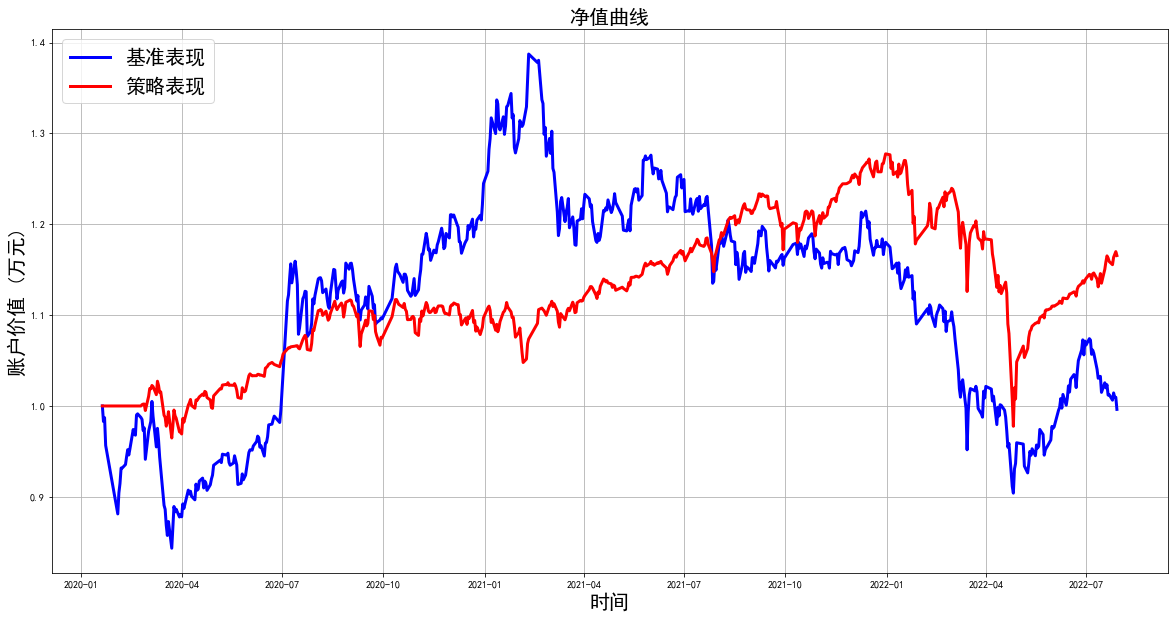

In [4]:
#默认情况下基准表现为沪深300指数
performance(start_time="2020-01-20", end_time="2022-07-31", pv=result[0]["present_value"]).get_performance()

{'开始时间': '2020-01-20',
 '结束时间': '2022-07-31',
 '超额收益': '-1.06%',
 '年化收益': '6.27%',
 '年化波动': '12.90%',
 '夏普比率': '0.49',
 '最大回撤': '23.48%'}

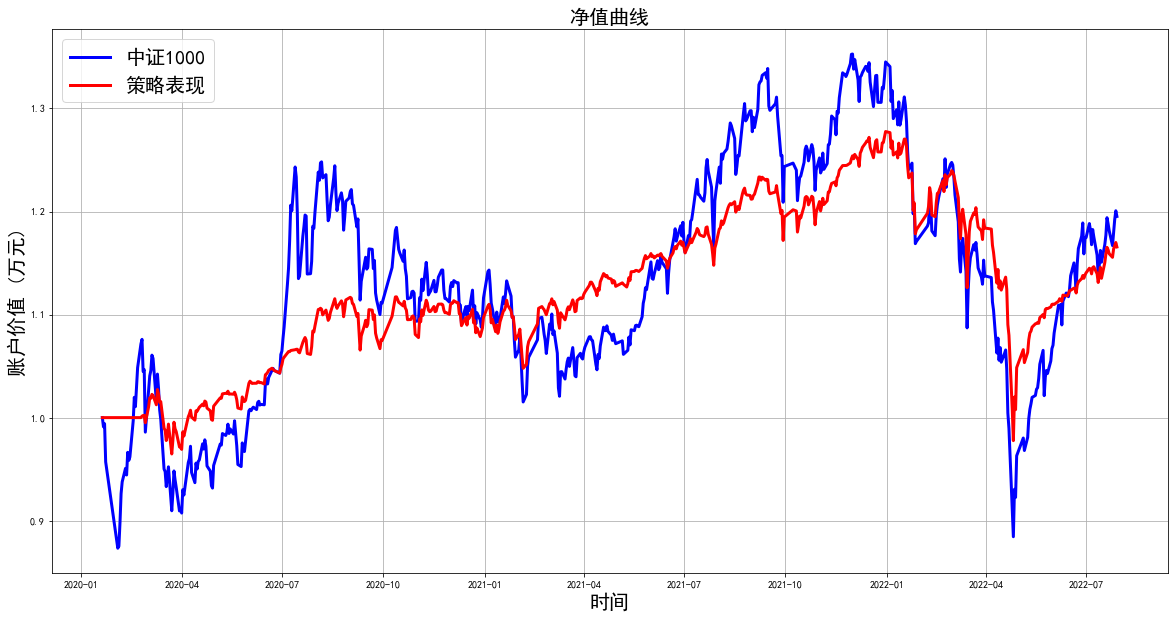

In [5]:
#与中证1000指数对比
performance(start_time="2020-01-20", end_time="2022-07-31", pv=result[0]["present_value"], benchmark_name="中证1000").get_performance()

## 均值-方差策略下的最小方差组合

In [6]:
stock_data = feather.read_dataframe("../data/stk_daily.feather")

In [7]:
#最小方差组合
result_2 = Mean_Variance_strategy(start_time= "2020-01-20", end_time="2021-07-31", freq= 20,
                       stock_list = stock_data["stk_id"].unique()[range(0,50,5)], fee = 0.0003)

date
2020-01-20    1.000000
2020-01-21    1.000000
2020-01-22    1.000000
2020-01-23    1.000000
2020-02-03    1.000000
                ...   
2021-07-26    1.161524
2021-07-27    1.121552
2021-07-28    1.111555
2021-07-29    1.117836
2021-07-30    1.115303
Name: present_value, Length: 371, dtype: float64


{'开始时间': '2020-02-20',
 '结束时间': '2021-06-30',
 '超额收益': '9.49%',
 '年化收益': '20.60%',
 '年化波动': '34.76%',
 '夏普比率': '0.59',
 '最大回撤': '20.86%'}

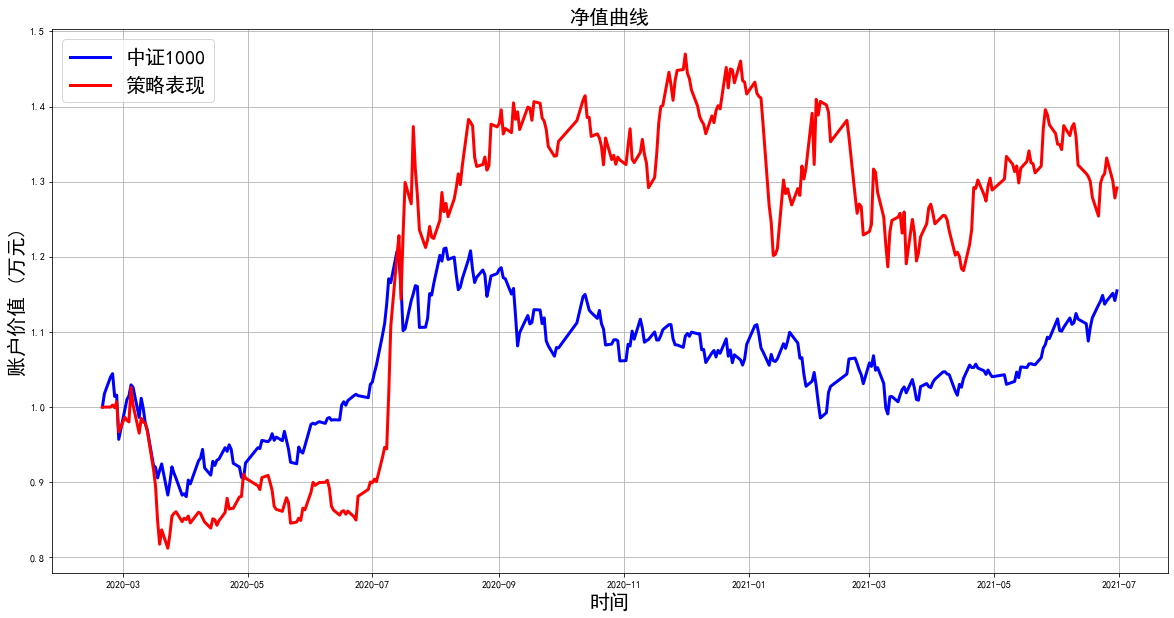

In [8]:
performance(start_time="2020-02-20", end_time="2021-06-30", pv=result_2[0], benchmark_name="中证1000").get_performance()

## 因子生成（这里做了国泰君安Alpha191的前20个因子）

In [9]:
stock_data = feather.read_dataframe("../data/stk_daily.feather")
stock_data["open"] *= stock_data["cumadj"]
stock_data["high"] *= stock_data["cumadj"]
stock_data["low"] *= stock_data["cumadj"]
stock_data["close"] *= stock_data["cumadj"]
stock_data["vwap"] = stock_data["amount"]/stock_data["volume"]

stock_data.set_index(["date","stk_id"],inplace=True)

In [10]:
#展示其中2个
Alpha191_first20.alpha008(stock_data).tail()

stk_id,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,872392.BJ,872808.BJ,872925.BJ,873001.BJ,873122.BJ,873169.BJ,873223.BJ,873305.BJ,873339.BJ,873527.BJ
date,,,,,,,,,,,,,,,,,,,,,
2022-12-26,0.225582,0.992043,0.384921,0.192759,0.035011,0.156754,0.518003,0.057688,0.198727,0.158942,...,NaN,0.949274,0.211259,NaN,0.574896,0.418540,0.444599,NaN,0.569723,0.565347
2022-12-27,0.033022,0.978118,0.175850,0.281878,0.014124,0.819375,0.399443,0.122538,0.504277,0.103441,...,NaN,0.960414,0.534315,NaN,0.361647,0.598767,0.600756,0.883628,0.730058,0.689676
2022-12-28,0.042511,0.996027,0.187128,0.341279,0.012515,0.681565,0.514303,0.893921,0.444378,0.178586,...,NaN,0.925705,0.672229,NaN,0.324394,0.595153,0.568931,0.854589,0.714144,0.625149
2022-12-29,0.148523,0.998017,0.255602,0.458854,0.032719,0.762443,0.591910,0.957763,0.589728,0.667063,...,NaN,0.884989,0.624033,NaN,0.454888,0.545905,0.724370,0.758675,0.705532,0.557010
2022-12-30,0.027965,0.997223,0.198929,0.378620,0.038278,0.679691,0.464300,0.935343,0.703887,0.602142,...,NaN,0.167989,0.438913,NaN,0.726696,0.408370,0.623165,0.364340,0.484728,0.453987


In [11]:
Alpha191_first20.alpha020(stock_data).tail()

stk_id,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,872392.BJ,872808.BJ,872925.BJ,873001.BJ,873122.BJ,873169.BJ,873223.BJ,873305.BJ,873339.BJ,873527.BJ
date,,,,,,,,,,,,,,,,,,,,,
2022-12-26,-4.272864,-5.211558,-2.474227,-0.540251,7.282416,-2.478459,-4.132231,-1.174628,0.260166,-1.931150,...,0.000000,-9.306204,-0.828729,0.000000,-4.625199,-4.341361,-7.756567,-14.505653,-8.182622,-6.605591
2022-12-27,0.536810,-4.341085,3.521719,5.000000,7.269790,0.512821,-0.425532,-1.128912,2.933333,-4.483587,...,0.000000,-6.593027,0.774648,-8.333162,-0.917033,-2.298851,-4.285367,-12.116590,-5.617151,-5.405650
2022-12-28,2.978056,-0.694816,1.165254,1.639640,22.262118,0.384271,-2.118644,-0.165821,-0.791557,7.200000,...,0.000000,-8.873144,-0.350877,-15.023852,-0.672898,-1.320132,-5.492015,-13.395607,-6.716418,-3.589639
2022-12-29,1.086113,-2.887701,2.906510,1.648647,9.269162,-3.473803,-1.716738,0.587741,-5.729167,1.057269,...,0.000000,-6.126687,-1.320361,-16.431769,-1.605849,-1.327241,-6.175790,-11.219940,-6.778845,-2.298219
2022-12-30,1.621622,-2.829685,4.198223,2.197951,12.500000,0.777202,-0.432900,-4.275651,0.000000,1.222707,...,-2.500715,-0.998217,1.186322,-15.962284,-0.166348,-0.501672,-3.892216,-5.420561,-3.467363,-1.227888


## 信号持仓分析（行业）

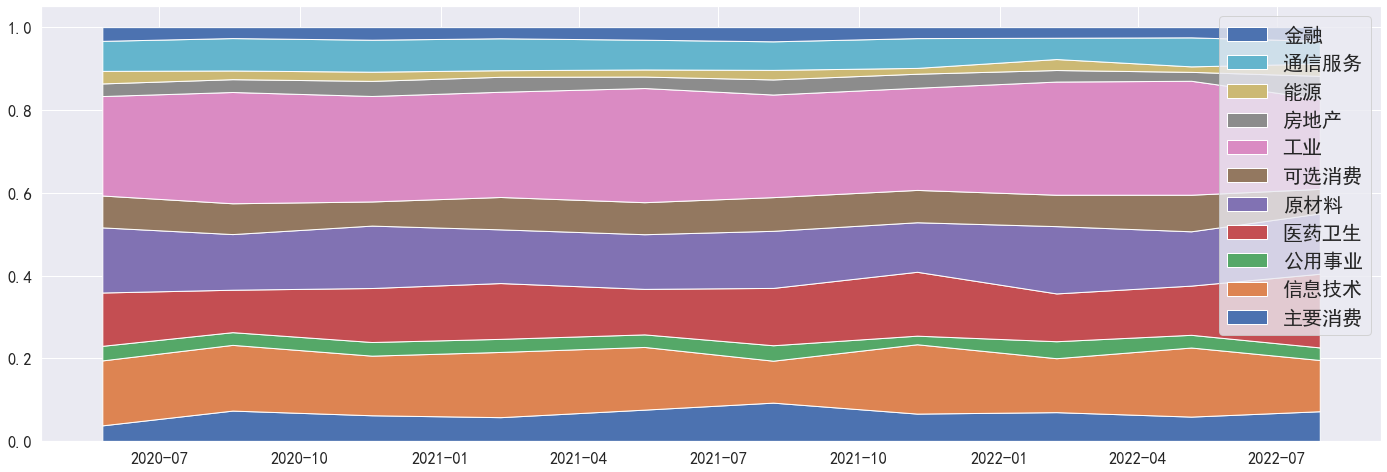

中证一级行业,主要消费,信息技术,公用事业,医药卫生,原材料,可选消费,工业,房地产,能源,通信服务,金融
date,,,,,,,,,,,
2020-05-25,0.038490,0.156835,0.035203,0.128728,0.157220,0.076977,0.240130,0.030493,0.030249,0.072534,0.033141
2020-08-18,0.074121,0.158695,0.030705,0.102448,0.134341,0.074406,0.268655,0.030957,0.020951,0.078280,0.026440
2020-11-17,0.062844,0.143922,0.032966,0.130380,0.150652,0.058313,0.254670,0.036469,0.022166,0.077244,0.030375
2021-02-09,0.058262,0.157484,0.031585,0.134736,0.129650,0.078156,0.254048,0.036161,0.015899,0.077089,0.026930
2021-05-14,0.076447,0.151361,0.030337,0.109884,0.131949,0.077330,0.275645,0.027691,0.017127,0.071838,0.030390
2021-08-06,0.093357,0.101261,0.037286,0.138444,0.137842,0.081322,0.247707,0.036463,0.023101,0.068940,0.034276
2021-11-08,0.066879,0.167396,0.020765,0.154234,0.119599,0.078090,0.246655,0.033887,0.014062,0.071926,0.026507
2022-02-07,0.070393,0.130218,0.041006,0.115414,0.162460,0.075831,0.273230,0.027910,0.026479,0.051410,0.025646
2022-05-06,0.059636,0.166772,0.030694,0.118782,0.131144,0.088312,0.275121,0.021534,0.013256,0.070060,0.024689


In [12]:
#基于前面的n日反转的信号进行持仓分析
signal_1 = result[1].fillna(0).iloc[20:]
analysis_result_1 = position_analysis(signal_1)
analysis_result_1

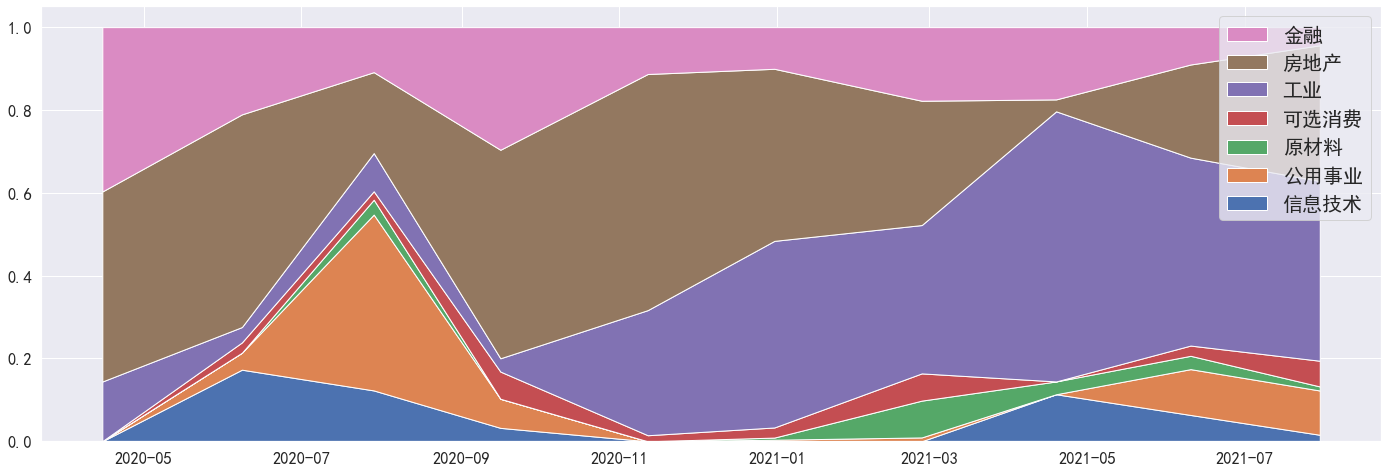

中证一级行业,信息技术,公用事业,原材料,可选消费,工业,房地产,金融
date,,,,,,,
2020-04-15,0.000000,0.000000,0.000385,0.000000,0.143973,0.458823,0.396819
2020-06-08,0.172899,0.040983,0.000000,0.024910,0.037052,0.513532,0.210623
2020-07-29,0.122807,0.424573,0.035960,0.020381,0.092135,0.195449,0.108694
2020-09-16,0.032432,0.070244,0.000000,0.065652,0.032117,0.503462,0.296094
2020-11-12,0.000000,0.000000,0.000000,0.014646,0.302066,0.570113,0.113175
2020-12-31,0.000000,0.003800,0.005189,0.024406,0.450527,0.415499,0.100580
2021-02-26,0.000094,0.009263,0.088843,0.065761,0.358161,0.300084,0.177794
2021-04-19,0.113603,0.000000,0.030912,0.000000,0.652136,0.028851,0.174497
2021-06-10,0.063570,0.110651,0.032178,0.024750,0.453707,0.224895,0.090249


In [13]:
signal_2 = result_2[1].iloc[20:]
analysis_result_2 = position_analysis(signal_2)
analysis_result_2